In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$
    y'' = y,\;\;y''(0) = y'(0) = y(0) = 1
$$

In [2]:
def ypp(y):
    return y


N = 15
xs = np.linspace(0,4,N)
h = xs[1] - xs[0]

smooth_xs = np.linspace(0,4,200)  # so we have smooth graphs for the analytical solutions:
analytical_yp = np.exp(smooth_xs)
analytical_y = np.exp(smooth_xs)

## Using Euler's Method First:

y' plot


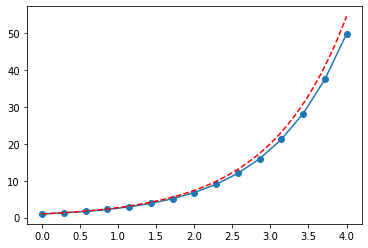




y plot


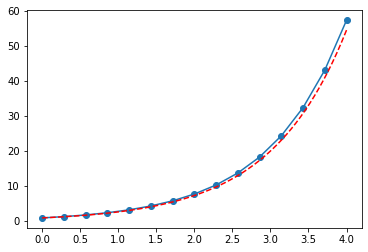

In [3]:
ypps = yps = ys = np.array([1])  # since y''(0) = y'(0) = y(0) = 1

yp = 0
y = 0

for x in xs[1:]:  # since y(xs[0]) = y(0) = 1
    
    yp = yps[-1] + ypp(ys[-1])*h
    y = ys[-1] + yp*h
    yps = np.append(yps, yp)
    ys = np.append(ys, y)

print("y' plot")
plt.plot(xs, yps, 'o-')
plt.plot(smooth_xs, analytical_yp, '--r')
plt.show()

print("\n\n\ny plot")
plt.plot(xs,ys, 'o-')
plt.plot(smooth_xs, analytical_y, '--r')
plt.show()

## Using Runge-Kutta:

Calculating $y'$ using $y'' = y'$. Then calculating $y$, using the $y'$ values we have computed and $y' = y$.

$$k_1 = f(y_i)\\
k_2= f(y_i+\tfrac{1}{2}k_1 h)\\
k_3= f(y_i+\tfrac{1}{2}k_2 h)\\
k_4 = f(y_i+k_3 h)$$

 Since the $k_n$ values pick on values of the function $f(y)$ - in our case $y'(y)$ - that are between $y'(y_i)$ and $y'(y_i + h)$, we need to compute the following values on each iteration:

$y'(y_i) = k_1\rightarrow$ nothing extra here, we have $k_1$!

$y'(y_i + \frac{h}{2}k_1)= k_2\;\rightarrow\;$ need $\left[y_i + \frac{h}{2}k_1\right]$ for $k_2$,

$y'(y_i + \frac{h}{2}k_2) = y'(y_i + \frac{h}{2}y'(y_i + \frac{h}{2}k_1)) = k_3\;\rightarrow\;$ need $\left[y_i + \frac{h}{2}y'(y_i + \frac{h}{2}k_1)\right]$ for $k_3$,

$y'(y_i + hk_3) = y'(y_i + hy'(y_i + \frac{h}{2}y'(y_i + \frac{h}{2}k_1)))\;\rightarrow\;$ need $\left[y_i + \frac{h}{2}y'(y_i + \frac{h}{2}k_1))\right]$ for $k_4$.


To get to this step, we will need to do 4 seperate computations of $y'$, each using the previous results, to then land on the values we require to get the $k_n$'s we need. The first 'computation' however will be free, as we already know $y'(0) = 1$, leaving only 3.


In [4]:
def ypp(yp):
    return yp

def yp(y):
    return y

y_k1 = 1
y_k2 = 1.1535644870192976
y_k3 = 1.179150762301048
y_k4 = 1.400597157817437

y = 1.336477507450387
yp = 1.3306955435235317
-------------------------------------------------- 


y_k1 = 1.3306955435235317
y_k2 = 1.609300105800487
y_k3 = 1.6746430172519524
y_k4 = 2.147196428770907

y = 1.8148478988027352
yp = 1.7707506295533877
-------------------------------------------------- 


y_k1 = 1.7707506295533877
y_k2 = 2.2804229288978437
y_k3 = 2.4526552993406594
y_k4 = 3.5683735983942637

y = 2.519861264727719
yp = 2.356329971438181
-------------------------------------------------- 


y_k1 = 2.356329971438181
y_k2 = 3.2992548516181346
y_k3 = 3.7749980432072334
y_k4 = 6.925651395625204

y = 3.6355987483807723
yp = 3.1355577920637185
-------------------------------------------------- 


y_k1 = 3.1355577920637185
y_k2 = 4.906889456551338
y_k3 = 6.319756019157975
y_k4 = 18.968792140007686

y = 5.757391171404107
yp = 4.1724727803596755
-------------------------------------------------- 



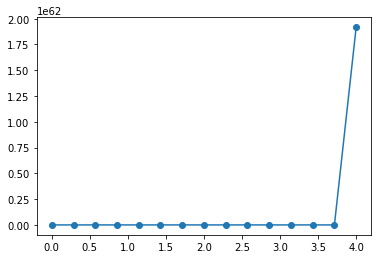

In [5]:
ypps = yps = ys = np.array([1])  # since y''(0) = y'(0) = y(0) = 1

yp = 0
y = 0
for x in xs[1:]:
    
    # -------------- For y_k1:
    yp1 = yps[-1]  # the latest value of y' will be our starting point each iteration.
    y_k1 = yp1  # and it is also our first k! 
    
    # -------------- For y_k2:
    # We need the value of y', (h/2)*y_k1 away from the first value. Let's define a distance h2 then:
    h2 = y_k1*h/2
    
    yp_k1_for_y_k2 = ypp(yp1)
    yp_k2_for_y_k2 = ypp(yp1+0.5*yp_k1_for_y_k2*h2)
    yp_k3_for_y_k2 = ypp(yp1+0.5*yp_k2_for_y_k2*h2)
    yp_k4_for_y_k2 = ypp(yp1+yp_k3_for_y_k2*h2)
    
    # this is going to be hard to fit:
    yp2 = yp1 + (1/6)*(yp_k1_for_y_k2 + 2*yp_k2_for_y_k2 + 2*yp_k3_for_y_k2 + yp_k4_for_y_k2)*h2
    y_k2 = yp2
    
    
    # -------------- For y_k3:
    # Now we go (h/2)*y_k2 - (y_k1*h/2) away from the last value, yp2. Defining h3 then:
    
    h3 = y_k2*h/2 - y_k1*h/2
    
    yp_k1_for_y_k3 = ypp(yp2)
    yp_k2_for_y_k3 = ypp(yp2+0.5*yp_k1_for_y_k3*h3)
    yp_k3_for_y_k3 = ypp(yp2+0.5*yp_k2_for_y_k3*h3)
    yp_k4_for_y_k3 = ypp(yp2+yp_k3_for_y_k3*h3)
    
    yp3 = yp2 + (1/6)*(yp_k1_for_y_k3 + 2*yp_k2_for_y_k3 + 2*yp_k3_for_y_k3 + yp_k4_for_y_k3)*h3
    y_k3 = yp3
    
    # -------------- For y_k4:
    # Now we go h*k3 - (h/2)k2 away from the last value, yp3. Defining h4 then:
    
    h4 = y_k3*h - h/2*y_k2
    
    yp_k1_for_y_k4 = ypp(yp3)
    yp_k2_for_y_k4 = ypp(yp3+0.5*yp_k1_for_y_k4*h4)
    yp_k3_for_y_k4 = ypp(yp3+0.5*yp_k2_for_y_k4*h4)
    yp_k4_for_y_k4 = ypp(yp3+yp_k3_for_y_k4*h4)
    
    yp4 = yp3 + (1/6)*(yp_k1_for_y_k4 + 2*yp_k2_for_y_k4 + 2*yp_k3_for_y_k4 + yp_k4_for_y_k4)*h4
    y_k4 = yp4
    
    
    # ------ That should be all, claiming the much deserved y value:
    
    y = ys[-1] + (1/6)*(y_k1 + 2*y_k2 + 2*y_k3 + y_k4)*h
    print(f"y_k1 = {y_k1}\ny_k2 = {y_k2}\ny_k3 = {y_k3}\ny_k4 = {y_k4}\n")
    print(f"y = {y}")
    ys = np.append(ys, y)
    
    
    # ------ Now we just need to calculate the y' value at h away from the initial value, for the next iteration.
    yp_k1 = ypp(yps[-1])
    yp_k2 = ypp(yps[-1]+0.5*yp_k1*h)
    yp_k3 = ypp(yps[-1]+0.5*yp_k2*h)
    yp_k4 = ypp(yps[-1]+yp_k3*h)
    
    yp = yps[-1] + (1/6)*(yp_k1 + 2*yp_k2 + 2*yp_k3 + yp_k4)*h
    print(f'yp = {yp}')
    print('-'*50,'\n\n')
    yps = np.append(yps, yp)

    
plt.plot(xs,ys, 'o-')
plt.show()

**We see that the values blow up here after iteration 6, unfortunately the N = 15 value doesn't seem viable for this code.**  

Let's see if it at least works with higher N's:

N = 200 plot:


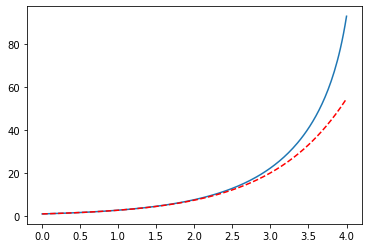

N = 500 plot:


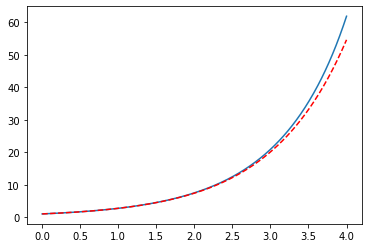

N = 1000 plot:


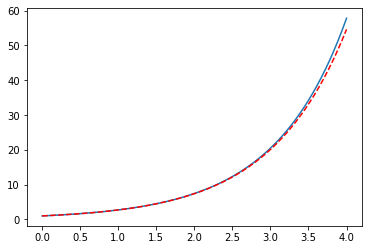

N = 10000 plot:


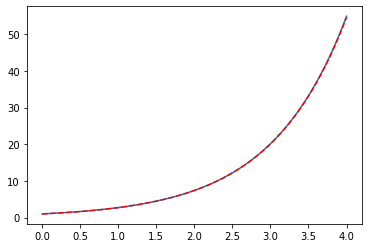

In [6]:
for N in [200, 500, 1000, 10000]:
    ypps = yps = ys = np.array([1])
    xs = np.linspace(0,4,N)
    h = xs[1] - xs[0]

    yp = 0
    y = 0
    for x in xs[1:]:

        yp1 = yps[-1]
        y_k1 = yp1

        h2 = y_k1*h/2

        yp_k1_for_y_k2 = ypp(yp1)
        yp_k2_for_y_k2 = ypp(yp1+0.5*yp_k1_for_y_k2*h2)
        yp_k3_for_y_k2 = ypp(yp1+0.5*yp_k2_for_y_k2*h2)
        yp_k4_for_y_k2 = ypp(yp1+yp_k3_for_y_k2*h2)

        yp2 = yp1 + (1/6)*(yp_k1_for_y_k2 + 2*yp_k2_for_y_k2 + 2*yp_k3_for_y_k2 + yp_k4_for_y_k2)*h2
        y_k2 = yp2


        h3 = y_k2*h/2 - y_k1*h/2

        yp_k1_for_y_k3 = ypp(yp2)
        yp_k2_for_y_k3 = ypp(yp2+0.5*yp_k1_for_y_k3*h3)
        yp_k3_for_y_k3 = ypp(yp2+0.5*yp_k2_for_y_k3*h3)
        yp_k4_for_y_k3 = ypp(yp2+yp_k3_for_y_k3*h3)

        yp3 = yp2 + (1/6)*(yp_k1_for_y_k3 + 2*yp_k2_for_y_k3 + 2*yp_k3_for_y_k3 + yp_k4_for_y_k3)*h3
        y_k3 = yp3


        h4 = y_k3*h - h/2*y_k2

        yp_k1_for_y_k4 = ypp(yp3)
        yp_k2_for_y_k4 = ypp(yp3+0.5*yp_k1_for_y_k4*h4)
        yp_k3_for_y_k4 = ypp(yp3+0.5*yp_k2_for_y_k4*h4)
        yp_k4_for_y_k4 = ypp(yp3+yp_k3_for_y_k4*h4)

        yp4 = yp3 + (1/6)*(yp_k1_for_y_k4 + 2*yp_k2_for_y_k4 + 2*yp_k3_for_y_k4 + yp_k4_for_y_k4)*h4
        y_k4 = yp4


        y = ys[-1] + (1/6)*(y_k1 + 2*y_k2 + 2*y_k3 + y_k4)*h
        ys = np.append(ys, y)

        yp_k1 = ypp(yps[-1])
        yp_k2 = ypp(yps[-1]+0.5*yp_k1*h)
        yp_k3 = ypp(yps[-1]+0.5*yp_k2*h)
        yp_k4 = ypp(yps[-1]+yp_k3*h)

        yp = yps[-1] + (1/6)*(yp_k1 + 2*yp_k2 + 2*yp_k3 + yp_k4)*h
        yps = np.append(yps, yp)

    print(f"N = {N} plot:")
    plt.plot(xs,ys)
    plt.plot(smooth_xs, analytical_yp, '--r')
    plt.plot()
    plt.show()

Got better as N increases, but that in the end defeats the whole purpose, so can't call this successful! :c